# Data Wrangling Notebook

## Required libraries

In [6]:
#!pip install tweepy

  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: oauthlib
    Found existing installation: oauthlib 3.1.1
    Uninstalling oauthlib-3.1.1:
      Successfully uninstalled oauthlib-3.1.1


In [705]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import datetime

%matplotlib inline

# Gathering

### About 

In this section, we will gather all the pieces of data that we need for our analysis. We basically have three sources:


1. Twitter Archive — This is a `.csv` file that contains basic tweet data for all 5000+ of @weRateDogs tweets, but not everything. It was provided by Udacity.


2. Image prediction — This is a `.tsv` file for tweet image predictions, i.e., what breed of dog, is present in each tweet, thanks to Udacity. We need to download it programatically.


3. Additional Data via the Twitter API — Each tweet's retweet count and favorite ("like") count need to be gathered (at minimum). Using the tweet IDs in the @WeRateDogs Twitter archive, we can query the Twitter API for each tweet's JSON data using Python's `tweepy` library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this `.txt` file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

### Checklist

- I have downloaded and uploaded `twitter_archive_enhanced.csv` and read it into a Pandas DataFrame.
- I have downloaded `image_predictions.tsv` from the provided URL using the `Request` library.
- I have queried each tweet's retweet count and favorite ("like") count using the `Tweepy` library and stored the data in `tweet_json.txt`.
- I have read the `tweet_json.txt` line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.

## Twitter archive

In [153]:
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [154]:
df_twitter_enhanced.shape

(2356, 17)

In [155]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Image Predictions

In [362]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [363]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [364]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [365]:
df_image_predictions.shape

(2075, 12)

## Twitter API

In [35]:
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [36]:
# Let's get the tweet IDs from the .csv file provided by Udacity
df_tweet_ids = df_twitter_enhanced['tweet_id']
df_tweet_ids

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [37]:
# This is the list that will contain tweets with exceptions/errors 
tweets_error_list = []

# List of all tweets
df_tweets = []

In [38]:
# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # Total number of favorites for the tweet.
        retweets = tweet['retweet_count'] # Total number of retweets.
        user_followers = tweet['user']['followers_count'] # Total number of followers of the user who tweeted.
        user_favourites = tweet['user']['favourites_count'] # Total number of favourites for the user who tweeted.
        date_time = tweet['created_at'] # The timestamp (date and time of creation of the tweet).
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id) + " _ " + str(e))
        tweets_error_list.append(tweet_id)

888202515573088257 _ 404 Not Found
144 - No status found with that ID.
874057562936811520 _ Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
873697596434513921 _ 404 Not Found
144 - No status found with that ID.
872668790621863937 _ 404 Not Found
144 - No status found with that ID.
872261713294495745 _ 404 Not Found
144 - No status found with that ID.
869988702071779329 _ 404 Not Found
144 - No status found with that ID.
866816280283807744 _ 404 Not Found
144 - No status found with that ID.
861769973181624320 _ 404 Not Found
144 - No status found with that ID.
856602993587888130 _ 404 Not Found
144 - No status found with that ID.
856330835276025856 _ 404 Not Found
144 - No status found with that ID.
851953902622658560 _ 404 Not Found
144 - No status found with that ID.
851861385021730816 _ 404 Not Found
144 - No status found with that ID.
845459076796616705 _ 404 Not Found
144 - No status found with that ID.
84470478840311

Rate limit reached. Sleeping for: 293


812747805718642688 _ 404 Not Found
144 - No status found with that ID.
802247111496568832 _ 404 Not Found
144 - No status found with that ID.
779123168116150273 _ 404 Not Found
144 - No status found with that ID.
775096608509886464 _ 404 Not Found
144 - No status found with that ID.
771004394259247104 _ 403 Forbidden
179 - Sorry, you are not authorized to see this status.
770743923962707968 _ 404 Not Found
144 - No status found with that ID.
766864461642756096 _ 404 Not Found
144 - No status found with that ID.
759923798737051648 _ 404 Not Found
144 - No status found with that ID.
759566828574212096 _ 404 Not Found
144 - No status found with that ID.
754011816964026368 _ 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 413


680055455951884288 _ 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 414


In [160]:
# The total number of tweets that we received from Twitter API
print("The lengh of the result", len(df_tweets))

# The total number of tweets that we couldn't get from Twitter API
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2326
The lengh of the errors 30


In [161]:
# Create a dataframe to save what we've just extracted
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

df_tweets_json.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33697,6969,9358958,147581,2017-08-01 16:23:56+00:00
1,892177421306343426,29223,5272,9358958,147581,2017-08-01 00:17:27+00:00
2,891815181378084864,21978,3464,9358958,147581,2017-07-31 00:18:03+00:00
3,891689557279858688,36790,7191,9358958,147581,2017-07-30 15:58:51+00:00
4,891327558926688256,35182,7717,9358958,147581,2017-07-29 16:00:24+00:00


In [162]:
# Saving the dataframe to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [163]:
# Reading the saved tweet_json.txt file into a dataframe to make sure everything working fine
df_tweets_json = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [164]:
# Let's check!
df_tweets_json.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33697,6969,9358958,147581,2017-08-01 16:23:56+00:00
1,892177421306343426,29223,5272,9358958,147581,2017-08-01 00:17:27+00:00
2,891815181378084864,21978,3464,9358958,147581,2017-07-31 00:18:03+00:00
3,891689557279858688,36790,7191,9358958,147581,2017-07-30 15:58:51+00:00
4,891327558926688256,35182,7717,9358958,147581,2017-07-29 16:00:24+00:00


In [165]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2326 non-null   int64 
 1   favorites        2326 non-null   int64 
 2   retweets         2326 non-null   int64 
 3   user_followers   2326 non-null   int64 
 4   user_favourites  2326 non-null   int64 
 5   date_time        2326 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


Now that our Data is all gathered, we can tackle the next step which is "Data Assessing".

# Assessing

### About

In this section, we will asses the data that we have in hands. We will basically be inspecting our data set for two things:
1. Data quality issues — Data that has quality issues have issues with content like missing, duplicate, or incorrect data. This is called dirty data.
2. Lack of tidiness — Data that has specific structural issues that slow you down when cleaning and analyzing, visualizing, or modeling your data later.

### Checklist

- I have used both visual assessment and programmatic assessment.
- I have included at least eight (8) data quality issues.
- I have included at least two (2) tidiness issues.
- I have documented each issue in a few sentences.

## Twitter Archive

In [166]:
df_twitter_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1248,711363825979756544,NaN,NaN,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10 https://t.co/nJIX...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/711363825...,11,10,None,None,None,None,None
1783,677673981332312066,NaN,NaN,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,None,None,None,None
2140,670003130994700288,NaN,NaN,2015-11-26 22:16:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raphael. He is a Baskerville Conquista...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670003130...,10,10,Raphael,None,None,None,None
740,780543529827336192,NaN,NaN,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780543529...,12,10,None,None,None,None,None
866,762035686371364864,NaN,NaN,2016-08-06 21:20:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762035686...,14,10,None,None,None,None,None


In [167]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [245]:
df_twitter_enhanced['text'].sample(20)

2314    This is a golden Buckminsterfullerene named Jo...
268     Here we have some incredible doggos for #K9Vet...
726     This is Timmy. He's quite large. According to ...
125     Here's a h*ckin peaceful boy. Unbothered by th...
2124    Meet Daisy. She's rebellious. Full of teen ang...
1646    Here we see a faulty pupper. Might need to rep...
1622    "Hello yes I'll just get one of each color tha...
2079    Scary dog here. Too many legs. Extra tail. Not...
60      This is Bella. She had her first beach experie...
1412    Meet CeCe. She wanted to take a selfie before ...
788     I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...
702     RT @dog_rates: This is Scout. He really wants ...
1038    This is Blanket. She has overthrown her human....
1719    Meet Goliath. He's an example of irony. Head i...
986     Meet Winston. He's pupset because I forgot to ...
869     Guys.. we only rate dogs. Pls don't send any m...
1467    Meet Grady. He's very hungry. Too bad no one c...
385     This i

In [168]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [61]:
df_twitter_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [62]:
df_twitter_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [172]:
len(df_twitter_enhanced[df_twitter_enhanced["retweeted_status_id"].notnull()])

181

In [88]:
sum(df_twitter_enhanced.rating_denominator.isnull())

0

In [173]:
df_twitter_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [175]:
df_twitter_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [176]:
df_twitter_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [177]:
df_twitter_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [180]:
df_twitter_enhanced['name'].sample(35)

1204       None
1549       Ferg
926       Rubio
668       Bruce
2102      Pluto
353     Scooter
999        None
1795      Tassy
733        None
183      Callie
2012     Ridley
1743       None
753        None
1450       None
257       Sadie
1482      Oscar
1455        Bob
696        None
1485     Dunkin
1959       None
1790       Axel
1584       None
1098       None
872        None
576        None
96         None
925      Watson
1298       None
320     Chester
1953    Kendall
2034          a
1528      Oddie
2033       None
1797        the
48        Rusty
Name: name, dtype: object

In [181]:
df_twitter_enhanced['source'][44]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [182]:
# Checking for duplicates
len(df_twitter_enhanced[df_twitter_enhanced.tweet_id.duplicated()])

0

## Image Predictions

In [187]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


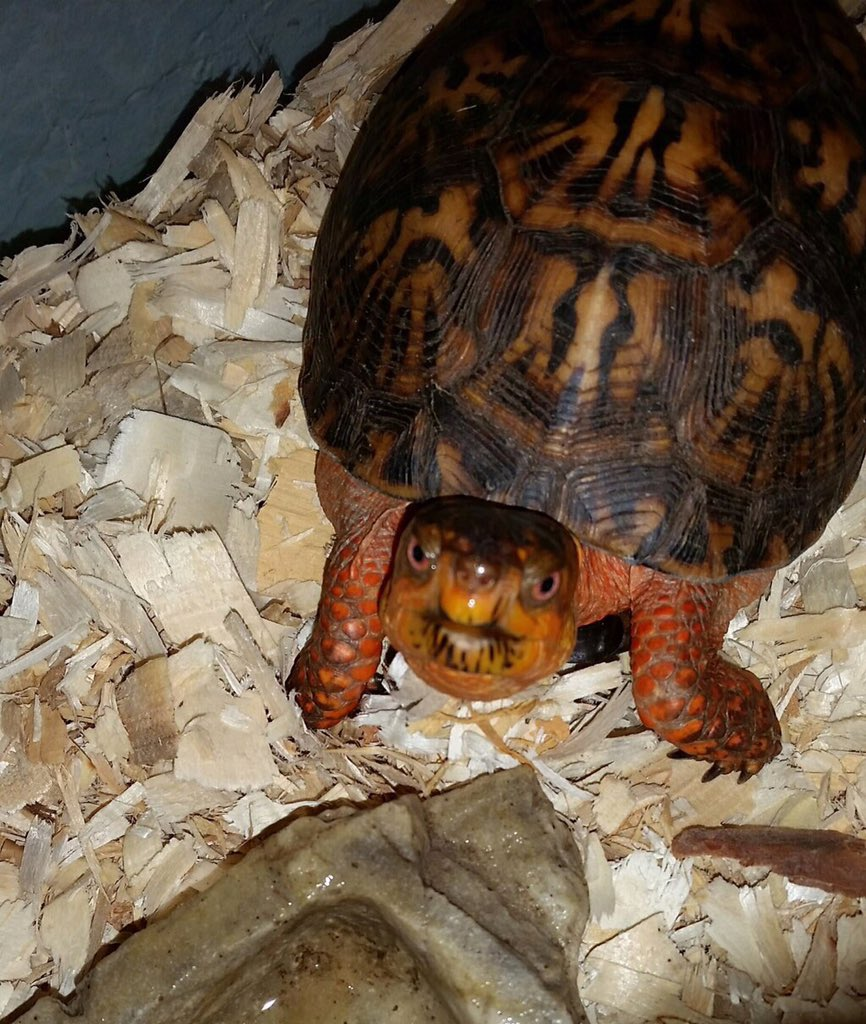

In [190]:
# Some pics aren't for dogs.
# This entry had the value False with the three algorithms.
response = requests.get(df_image_predictions["jpg_url"][6])
img = Image.open(BytesIO(response.content))
img

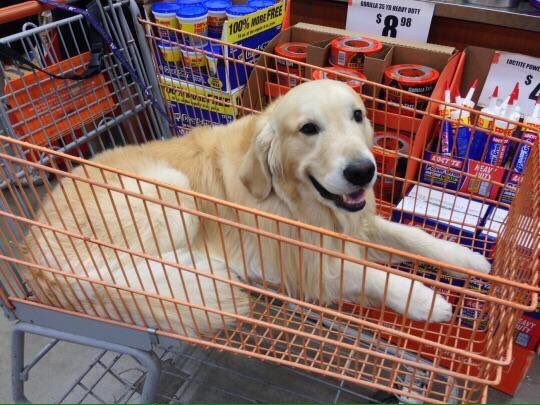

In [191]:
# Some pics aren't for dogs
response = requests.get(df_image_predictions["jpg_url"][8])
img = Image.open(BytesIO(response.content))
img

In [192]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [193]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [194]:
len(df_image_predictions[df_image_predictions.jpg_url.duplicated()])

66

## Twitter API

In [195]:
df_tweets_json.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33697,6969,9358958,147581,2017-08-01 16:23:56+00:00
1,892177421306343426,29223,5272,9358958,147581,2017-08-01 00:17:27+00:00
2,891815181378084864,21978,3464,9358958,147581,2017-07-31 00:18:03+00:00
3,891689557279858688,36790,7191,9358958,147581,2017-07-30 15:58:51+00:00
4,891327558926688256,35182,7717,9358958,147581,2017-07-29 16:00:24+00:00


In [196]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2326 non-null   int64 
 1   favorites        2326 non-null   int64 
 2   retweets         2326 non-null   int64 
 3   user_followers   2326 non-null   int64 
 4   user_favourites  2326 non-null   int64 
 5   date_time        2326 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


In [197]:
df_tweets_json.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.326000e+03,2326.000000,2326.00000,2.326000e+03,2326.000000
mean,7.417361e+17,7021.142734,2458.33577,9.358972e+06,147581.032674
std,6.816742e+16,10918.563672,4164.70640,6.161632e+01,0.360118
min,6.660209e+17,0.000000,1.00000,9.358958e+06,147581.000000
25%,6.780814e+17,1218.750000,492.25000,9.358962e+06,147581.000000
50%,7.178159e+17,3036.500000,1143.50000,9.358964e+06,147581.000000
75%,7.986402e+17,8554.500000,2839.75000,9.358965e+06,147581.000000
max,8.924206e+17,144157.000000,70336.00000,9.359434e+06,147585.000000


## Quality Issues

#### df_twitter_enhanced

- Remove retweets.
- `timestamp` should be datetime not an object (string).
- Extra HTML text in the `source` column.
- In the name column, we have null objects are not declared as non-null objects (None is different that `NaN` in Python). So we should turn `None` to `NaN`.
- Incorrect names or missing names in name column such as, a, an, the, very (entries that are not names) and a lot of names are written in lowercase.
- `puppo`, `floofer`, `pupper` and `doggo` should be boolean.
- The ratings is not standard since there are different denominators. So we better add a new column that contains the rating.

#### df_image_predictions

- Remove duplicate `jpg_url` entries.
- Refine `p1`, `p2` and `p3` columns and confidence associated by combining.

#### df_tweets_json

- `user_favourites`, and `user_followers` values are identical for all rows, which is specious, we should deal with this.
- Drop the `datetime` column because we already have `timestamp` in `df_twitter_enhanced`.

## Tidiness

- Three columns are present for variable dog stage - pupper, puppo and doggo. So we should merge them.
- Join archive, predictions and tweet_json tables to have a more concise dataframe for our analysis. And we remove redondante columns such as datetime in the df_tweets_json dataframe.

# Cleaning

Let's make a copy of our dataframes so we can clean them, and keep the original ones in case we need them at some point.

In [597]:
df_twitter_enhanced_clean = df_twitter_enhanced.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_json_clean = df_tweets_json.copy()

### df_twitter_enhanced

#### Removing retweets and columns that come with it

<font color='purple'>Code</font>

In [598]:
len(df_twitter_enhanced_clean[df_twitter_enhanced_clean.retweeted_status_id.notnull()])

181

In [599]:
df_twitter_enhanced_clean.shape

(2356, 17)

In [600]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean[np.isnan(df_twitter_enhanced_clean.retweeted_status_id)]

In [601]:
# We drop other columns that are related to retweets.
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

<font color='purple'>Test</font>

In [602]:
df_twitter_enhanced_clean.shape

(2175, 12)

In [603]:
df_twitter_enhanced_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### `timestamp` should be datetime not an object (string)

<font color='purple'>Code</font>

In [604]:
# Remove the timezone from both columns
df_twitter_enhanced_clean['timestamp'] = df_twitter_enhanced_clean['timestamp'].str.slice(start=0, stop=-6)

In [605]:
# Change the datatype to datetime
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

<font color='purple'>Test</font>

In [606]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


#### Extra HTML text in the `source` column

<font color='purple'>Code</font>

In [607]:
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

<font color='purple'>Test</font>

In [608]:
df_twitter_enhanced_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2175, dtype: object

In [609]:
df_twitter_enhanced_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Incorrect names or missing names

<font color='purple'>Code</font>

In [610]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean['name'].str.contains('^[a-z]')]['name']

22       such
56          a
169     quite
193     quite
335       not
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 104, dtype: object

In [611]:
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['name'].str.contains('^[a-z]'), 'name'] = 'None'

In [612]:
df_twitter_enhanced_clean.name = df_twitter_enhanced_clean.name.str.capitalize()

<font color='purple'>Test</font>

In [613]:
len(df_twitter_enhanced_clean[df_twitter_enhanced_clean['name'].str.contains('^[a-z]')])

0

In [614]:
df_twitter_enhanced_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2175, dtype: object

#### Going from `None` to `NaN` in the name column

<font color='purple'>Code</font>

In [615]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


In [616]:
df_twitter_enhanced_clean['name'].replace('None', np.nan, inplace=True)

<font color='purple'>Test</font>

In [617]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                1391 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


#### `puppo`, `floofer`, `pupper` and `doggo` into Boolean

<font color='purple'>Code</font>

In [618]:
df_twitter_enhanced_clean['doggo'] = np.where(df_twitter_enhanced_clean['doggo'] == 'None', False, True)

In [619]:
df_twitter_enhanced_clean['floofer'] = np.where(df_twitter_enhanced_clean['floofer'] == 'None', False, True)

In [620]:
df_twitter_enhanced_clean['puppo'] = np.where(df_twitter_enhanced_clean['puppo'] == 'None', False, True)

In [621]:
df_twitter_enhanced_clean['pupper'] = np.where(df_twitter_enhanced_clean['pupper'] == 'None', False, True)

<font color='purple'>Test</font>

In [622]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                1391 non-null   object        
 8   doggo               2175 non-null   bool          
 9   floofer             2175 non-null   bool          
 10  pupper              2175 non-null   bool          
 11  puppo               2175 non-null   bool          
dtypes: bool(4), datetime64[ns](1), int64(3), object(4)
memory usage: 161.4+ KB


#### New rating column

<font color='purple'>Code</font>

In [623]:
df_twitter_enhanced_clean['rating'] = df_twitter_enhanced_clean['rating_numerator'] / df_twitter_enhanced_clean['rating_denominator']

<font color='purple'>Test</font>

In [624]:
df_twitter_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,False,False,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False,False,False,False,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False,False,False,False,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False,False,False,False,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False,False,False,False,1.2


### df_image_predictions

In [659]:
df_image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Remove duplicate `jpg_url` entries.

<font color='purple'>Code</font>

In [660]:
df_image_predictions_clean.shape

(2075, 12)

In [661]:
# Drop all rows with duplicate addresses for jpg_url
df_image_predictions_clean = df_image_predictions_clean.drop_duplicates(subset='jpg_url')

<font color='purple'>Test</font>

In [662]:
df_image_predictions_clean.shape

(2009, 12)

#### Refine `p1`, `p2` and `p3`

<font color='purple'>Code</font>

In [664]:
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        if dataframe['p2_dog'] == True:
            # All models have positive prediction
            if dataframe['p3_dog'] == True:
                if ((dataframe['p1_conf'] > dataframe['p2_conf']) and (dataframe['p1_conf'] > dataframe['p3_conf'])):
                    prediction.append(dataframe['p1'])
                    confidence.append(dataframe['p1_conf'])
                else:
                    if ((dataframe['p2_conf'] > dataframe['p1_conf']) and (dataframe['p3_conf'] > dataframe['p2_conf'])):
                        prediction.append(dataframe['p2'])
                        confidence.append(dataframe['p2_conf'])
                    else:
                        if ((dataframe['p2_conf'] > dataframe['p1_conf']) and (dataframe['p3_conf'] > dataframe['p2_conf'])):
                            prediction.append(dataframe['p3'])
                            confidence.append(dataframe['p3_conf'])
            # We choose between p1 and p2
            else:
                if (dataframe['p1_conf'] > dataframe['p2_conf']):
                    prediction.append(dataframe['p1'])
                    confidence.append(dataframe['p1_conf'])
                else:
                    prediction.append(dataframe['p2'])
                    confidence.append(dataframe['p2_conf'])
        # We choose between p1 and p3 If p3 is positive
        else:
            if dataframe['p3_dog'] == True:
                if (dataframe['p1_conf'] > dataframe['p3_conf']):
                    prediction.append(dataframe['p1'])
                    confidence.append(dataframe['p1_conf'])
                else:
                    prediction.append(dataframe['p3'])
                    confidence.append(dataframe['p3_conf'])
            else:
                prediction.append(dataframe['p1'])
                confidence.append(dataframe['p1_conf'])
    # we choose between p2 and p3 or nothing
    else:
        if dataframe['p2_dog'] == True:
            if dataframe['p3_dog'] == True:
                if (dataframe['p2_conf'] > dataframe['p3_conf']):
                    prediction.append(dataframe['p2'])
                    confidence.append(dataframe['p2_conf'])
                else:
                    prediction.append(dataframe['p3'])
                    confidence.append(dataframe['p3_conf']) 
            else:
                prediction.append(dataframe['p2'])
                confidence.append(dataframe['p2_conf'])
        else:
            if dataframe['p3_dog'] == True:
                prediction.append(dataframe['p3'])
                confidence.append(dataframe['p3_conf'])
            else:
                prediction.append('Not a dog')
                confidence.append(max(dataframe['p1_conf'], dataframe['p2_conf'], dataframe['p3_conf']))

df_image_predictions_clean.apply(get_prediction_confidence, axis=1)
df_image_predictions_clean['prediction'] = prediction
df_image_predictions_clean['confidence'] = confidence

In [665]:
df_image_predictions_clean = df_image_predictions_clean.drop(['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf'], axis=1)

In [666]:
df_image_predictions_clean.head(5)

,tweet_id,jpg_url,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### df_tweets_json

#### `datetime` column should be removed

<font color='purple'>Code</font>

In [635]:
df_tweets_json_clean = df_tweets_json_clean.drop(['date_time'], axis=1)

<font color='purple'>Test</font>

In [668]:
df_tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2326 non-null   int64
 1   favorites        2326 non-null   int64
 2   retweets         2326 non-null   int64
 3   user_followers   2326 non-null   int64
 4   user_favourites  2326 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


#### `user_favourites`, and `user_followers` values are identical for all rows

<font color='purple'>Code</font>

In [669]:
df_tweets_json_clean.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites
0,892420643555336193,33697,6969,9358958,147581
1,892177421306343426,29223,5272,9358958,147581
2,891815181378084864,21978,3464,9358958,147581
3,891689557279858688,36790,7191,9358958,147581
4,891327558926688256,35182,7717,9358958,147581


In [670]:
df_tweets_json_clean = df_tweets_json_clean.drop(['user_followers', 'user_favourites'], axis=1)

<font color='purple'>Test</font>

In [671]:
df_tweets_json_clean.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,33697,6969
1,892177421306343426,29223,5272
2,891815181378084864,21978,3464
3,891689557279858688,36790,7191
4,891327558926688256,35182,7717


## Tidiness

#### Merging `puppo`, `pepper`, `floofer`, and `doggo` into one column

<font color='purple'>Code</font>

In [672]:
df_twitter_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,False,False,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False,False,False,False,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False,False,False,False,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False,False,False,False,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False,False,False,False,1.2


In [673]:
df_twitter_enhanced_clean['stage'] = np.where(df_twitter_enhanced_clean['doggo'] == True, 'doggo',
                              np.where(df_twitter_enhanced_clean['puppo'] == True, 'puppo',
                              np.where(df_twitter_enhanced_clean['pupper'] == True, 'pupper',
                              np.where(df_twitter_enhanced_clean['floofer'] == True, 'floofer',
                              np.nan
                              ))))

In [674]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

<font color='purple'>Test</font>

In [675]:
df_twitter_enhanced_clean['stage'].value_counts()

nan        1831
pupper      224
doggo        87
puppo        24
floofer       9
Name: stage, dtype: int64

In [676]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                1391 non-null   object        
 8   rating              2175 non-null   float64       
 9   stage               2175 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 186.9+ KB


#### Join the three dataframes

In [677]:
df_twitter_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,nan
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,nan
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,nan
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,nan
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,nan


In [678]:
df_tweets_json_clean.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,33697,6969
1,892177421306343426,29223,5272
2,891815181378084864,21978,3464
3,891689557279858688,36790,7191
4,891327558926688256,35182,7717


In [679]:
df_image_predictions_clean.head(5)

,tweet_id,jpg_url,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [680]:
df_tweets_json_clean.shape

(2326, 3)

In [681]:
df_image_predictions_clean.shape

(2009, 4)

In [682]:
df_twitter_enhanced_clean.shape

(2175, 10)

In [683]:
df_archive_master = pd.merge(df_twitter_enhanced_clean, df_tweets_json_clean, on='tweet_id', how='left')

In [684]:
df_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,nan,33697.0,6969.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,nan,29223.0,5272.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,nan,21978.0,3464.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,nan,36790.0,7191.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,nan,35182.0,7717.0


In [685]:
df_archive_master.shape

(2175, 12)

In [686]:
df_archive_master = pd.merge(df_archive_master, df_image_predictions_clean, on='tweet_id', how='left')
df_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage,favorites,retweets,jpg_url,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,nan,33697.0,6969.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Not a dog,0.097049
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,nan,29223.0,5272.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,nan,21978.0,3464.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,nan,36790.0,7191.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,nan,35182.0,7717.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


### Final DataFrame

In [687]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                1391 non-null   object        
 8   rating              2175 non-null   float64       
 9   stage               2175 non-null   object        
 10  favorites           2166 non-null   float64       
 11  retweets            2166 non-null   float64       
 12  jpg_url             1994 non-null   object        
 13  prediction          1994 non-null   object      

In [690]:
df_archive_master.retweets = df_archive_master.retweets.fillna(0)
df_archive_master.favorites = df_archive_master.favorites.fillna(0)

In [691]:
df_archive_master.retweets.astype(int)
df_archive_master.favorites.astype(int)

0       33697
1       29223
2       21978
3       36790
4       35182
        ...  
2170       88
2171      246
2172      100
2173      112
2174     2283
Name: favorites, Length: 2175, dtype: int32

In [695]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                1391 non-null   object        
 8   rating              2175 non-null   float64       
 9   stage               2175 non-null   object        
 10  favorites           2175 non-null   float64       
 11  retweets            2175 non-null   float64       
 12  jpg_url             1994 non-null   object        
 13  prediction          1994 non-null   object      

In [694]:
# Let's save the dataframe
df_archive_master.to_csv("twitter_archive_master.csv",index=False)

# Analyzing and Visualizing Data

### About

In this section, we will do some visuals and run some analysis in order to come up with good insights and feed our curiosity about our data.

### Checklist

- I have generated at least three (3) separate insights.
- I have produced at least one (1) labeled visualization.
- I have documented the data used to make each analysis and visualization.

## Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heat Map')

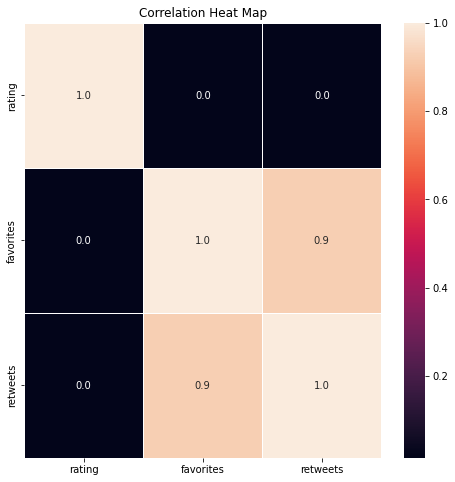

In [749]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_archive_master[['rating','favorites','retweets']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax);
plt.title('Correlation Heat Map')

### Insight
- We can clearly see that there's a strong correlation between favorites and retweets, which kind of expected.
- There's no correlation between retweets and rating, favorites and rating.

## Tweets over time

In [703]:
monthly_tweets = df_archive_master.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2175
dtype: int64

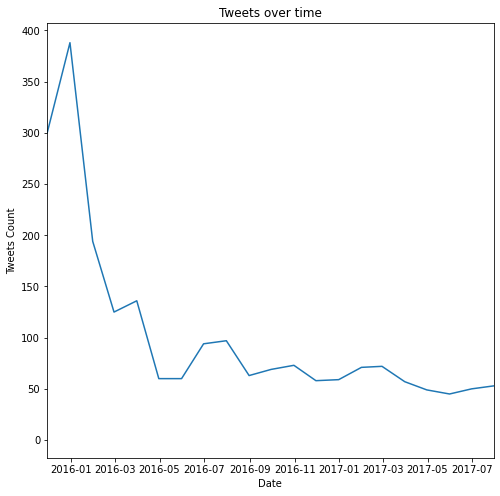

In [750]:
plt.figure(figsize=(8, 8));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Date')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('Tweets over time');

### Insight
- We can clearly see that the tweets count was decreasing tremendously.

## Dogs stages

In [711]:
df_archive_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage,favorites,retweets,jpg_url,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,nan,33697.0,6969.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Not a dog,0.097049
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,nan,29223.0,5272.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,nan,21978.0,3464.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


In [712]:
stages = df_archive_master.stage.value_counts()
stages = pd.DataFrame(stages).reset_index()
stages.columns = ['stage','count']
stages

,stage,count
0,nan,1831
1,pupper,224
2,doggo,87
3,puppo,24
4,floofer,9


Text(0.5, 0, 'Count')

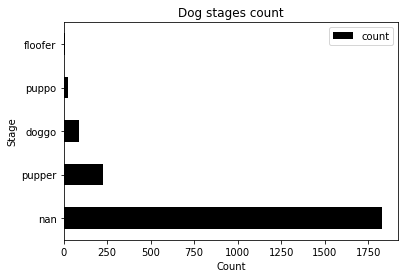

In [733]:
stages.set_index('stage').plot(kind ='barh', color='black')
plt.title('Dog stages count');
plt.ylabel('Stage') 
plt.xlabel('Count') 

### Insights
- Dogs in Pupper stage of dog life cycle get most tweets, which is expected.
- However, most dogs in our dataset are missing the stage.

## Dogs prediction

In [736]:
prediction = df_archive_master.prediction.value_counts()
prediction = pd.DataFrame(prediction).reset_index()
prediction.columns = ['prediction','count']
prediction = prediction[0:5]

Text(0.5, 0, 'Count')

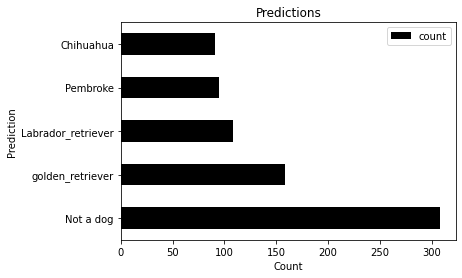

In [737]:
prediction.set_index('prediction').plot(kind ='barh', color='black')
plt.title('Predictions');
plt.ylabel('Prediction') 
plt.xlabel('Count') 

### Insights
- The most common predictions by our NN models are the following: "Not a dog", "Golden Retriever", "Pembroke", and "Chihuahua".

## Dogs stages with ratings

In [740]:
ratings = df_archive_master.groupby('stage').mean()['rating']
ratings = ratings.reset_index()

In [745]:
ratings = ratings[ratings['stage'] != 'nan']

In [747]:
ratings

,stage,rating
0,doggo,1.177011
1,floofer,1.188889
3,pupper,1.080804
4,puppo,1.204167


Text(0.5, 0, 'Avg. Rating')

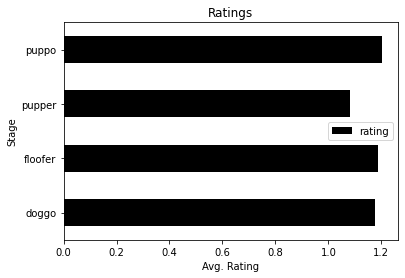

In [748]:
ratings.set_index('stage').plot(kind ='barh', color='black')
plt.title('Ratings');
plt.ylabel('Stage') 
plt.xlabel('Avg. Rating') 

### Insights
- We can clearly see that puppos are on the top of the list.